In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
# Read the file
df=pd.read_excel("Data set.xlsx","Sales data")

In [3]:
df.style.background_gradient(cmap="Greens")

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [4]:
# Variable Details
# Independent Variables - CPI, discounts, offers
# Dependent Variable - Sales

In [5]:
df.corr()

,CPI,discounts,offers,Sales
CPI,1.000000,0.664772,-0.445300,0.901476
discounts,0.664772,1.000000,-0.816902,0.829877
offers,-0.445300,-0.816902,1.000000,-0.734167
Sales,0.901476,0.829877,-0.734167,1.000000


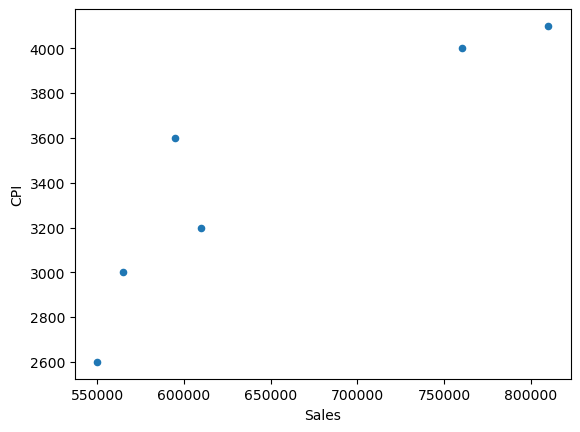

In [6]:
# Scatter Plot between Dependent and Independent Variables
df.plot(kind="scatter",x="Sales",y="CPI");
plt.show()

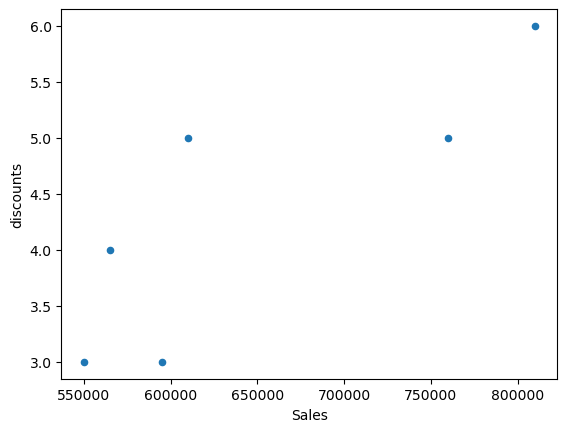

In [7]:
df.plot(kind="scatter",x="Sales",y="discounts");
plt.show()

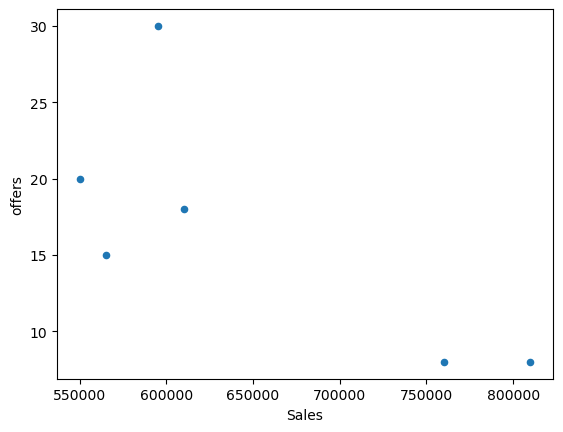

In [8]:
df.plot(kind="scatter",x="Sales",y="offers");
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


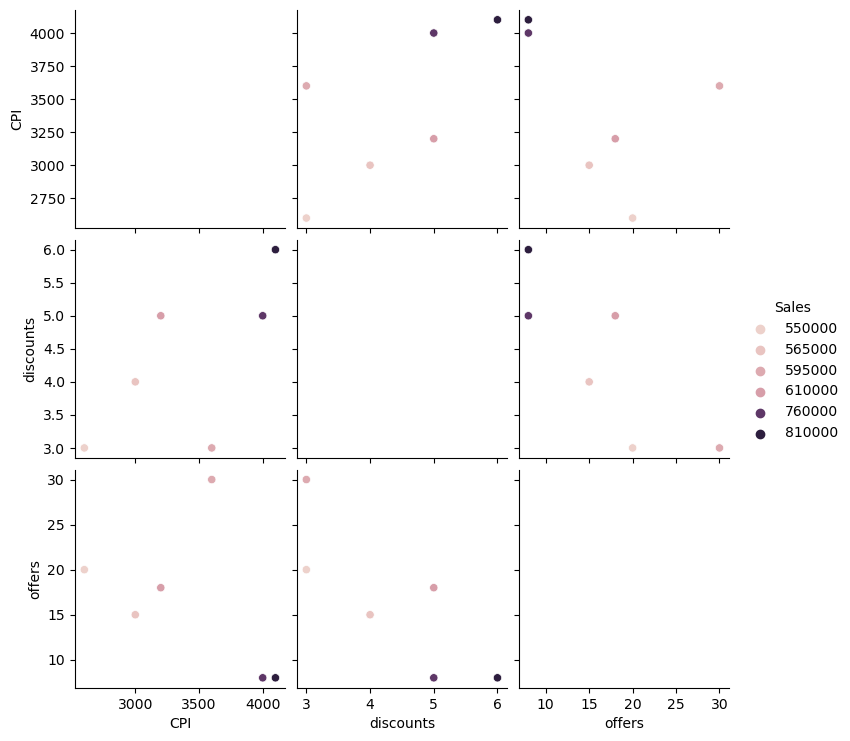

In [9]:
sns.pairplot(df,hue="Sales");

In [10]:
df.describe().style.background_gradient(cmap="Blues")

,CPI,discounts,offers,Sales
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.333333,16.500000,648333.333333
std,587.934237,1.211060,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.500000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [19]:
import statsmodels.formula.api as smf
lr_model=smf.ols(data=df,formula="Sales~CPI+discounts+offers")
final=lr_model.fit()
final.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     13.14
Date:                Tue, 30 Jan 2024   Prob (F-statistic):             0.0716
Time:                        19:43:31   Log-Likelihood:                -68.476
No. Observations:                   6   AIC:                             145.0
Df Residuals:                       2   BIC:                             144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.64e+05      1.613      0.248   -4.41e+05    9.71e+05
CPI          128.4351     39.639      3.240      0.083     -42.120     298.990
discounts   5913.5196   2.99e+04      0.198      0.861   -1.23e+05    1.34e+05
offers     -4902.5460   3641.815     -1.346      0.311   -2.06e+04    1.08e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.185
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.238
Skew:                          -0.031   Prob(JB):                        0.888
Kurtosis:                       2.026   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Selecting the Variables
x = df.drop('Sales',axis="columns")
y = df["Sales"]

In [12]:
x

,CPI,discounts,offers
0,2600,3,20
1,3000,4,15
2,3200,5,18
3,3600,3,30
4,4000,5,8
5,4100,6,8


In [13]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: Sales, dtype: int64

In [14]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
model.coef_

array([  128.43512778,  5913.51964731, -4902.54602054])

In [16]:
model.intercept_

264780.07095467095

In [17]:
def prediction(CPI,offers,discount):
    pred = model.predict([[CPI,offers,discount]])
    return pred
CPI = int(input("Enter CPI : "))
offers = int(input("Enter offers : "))
discount = int(input("Enter Discounts : "))
prediction(CPI,offers,discount)

Enter CPI : 5000
Enter offers : 3
Enter Discounts : 20


C:\Users\muthu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([826645.34838222])

In [18]:
def prediction(CPI,offers,discount):
    pred = model.predict([[CPI,offers,discount]])
    return pred
CPI = int(input("Enter CPI : "))
offers = int(input("Enter offers : "))
discount = int(input("Enter Discounts : "))
prediction(CPI,offers,discount)

Enter CPI : 4000
Enter offers : 8
Enter Discounts : 19


C:\Users\muthu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([732680.36486005])